# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu

# Set constants

In [2]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (20, 6)
dpi = 200

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

filename = "violin.svg"

# Import data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.csv"), index_col=[0, 1]).iloc[:, [0]]
GMHI2_scores = pd.read_csv(os.path.join(config.LOG_DIR, "GMHI2_scores_training_set.csv"), index_col=[0, 1])
GMHI_scores = pd.read_csv(os.path.join(config.LOG_DIR, "GMHI_scores_training_set.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores.head())
display(GMHI_scores.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283294        0.000000                     0.000000   
         SAMN03283288        0.011865                     0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283294                                            0.000000   
         SAMN03283288                                            0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283294                                               0.000000                      
         SAMN03283288                                               0.011865                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-10  SAMN03283239                                               0.000000                                             
         SAMN03283266                                               0.000000                                             
         SAMN03283281                                               0.009764                                             
         SAMN03283294                                               0.000000                                             
         SAMN03283288                                               0.011865                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-10  SAMN03283239                                               0.000000                                                                   
         SAMN03283266                                               0.000000                                                                   
         SAMN03283281                                               0.009764                                                                   
         SAMN03283294                                               0.000000                                                                   
         SAMN03283288                                               0.011865                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-10  SAMN03283239                                               0.000000              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283294                              True
         SAMN03283288                              True

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.991018
         SAMN03283266      0.223238
         SAMN03283281      1.053933
         SAMN03283294      1.790399
         SAMN03283288      1.684938

GMHI
Study_ID Sample Accession          
GMHI-10  SAMN03283239      3.927578
         SAMN03283266      1.797797
         SAMN03283281      3.255258
         SAMN03283294      1.440170
         SAMN03283288      0.877647

# Compute other ecological indices for comparisons

## Compute Richness

In [4]:
X_species = X[list(filter(lambda x : "s__" in x, X.columns))]
richness = pd.DataFrame((X_species > config.PRESENCE_CUTOFF).sum(axis=1), columns=["Species Richness"])
richness

Species Richness
Study_ID  Sample Accession                  
GMHI-10   SAMN03283239                    51
          SAMN03283266                    76
          SAMN03283281                    74
          SAMN03283294                    94
          SAMN03283288                   113
...                                      ...
Yang_2020 SRR6456373                      73
          SRR6456374                      80
          SRR6456375                      90
          SRR6456376                      89
          SRR6456377                      77

[8204 rows x 1 columns]

## Compute Shannon Diversity

In [5]:
shannon = pd.DataFrame(np.sum((-X_species * np.log(X_species)).fillna(0), axis=1), columns=["Shannon Diversity"])
shannon

Shannon Diversity
Study_ID  Sample Accession                   
GMHI-10   SAMN03283239               2.429760
          SAMN03283266               2.711069
          SAMN03283281               2.885216
          SAMN03283294               2.533818
          SAMN03283288               3.133189
...                                       ...
Yang_2020 SRR6456373                 2.393276
          SRR6456374                 2.682308
          SRR6456375                 2.734653
          SRR6456376                 2.763858
          SRR6456377                 1.725367

[8204 rows x 1 columns]

## Compute Simpsons Diversity

In [6]:
simpson = pd.DataFrame(np.sum(X_species ** 2, axis=1), columns=["Simpson Diversity"])
simpson

Simpson Diversity
Study_ID  Sample Accession                   
GMHI-10   SAMN03283239               0.196903
          SAMN03283266               0.119524
          SAMN03283281               0.096525
          SAMN03283294               0.158091
          SAMN03283288               0.098531
...                                       ...
Yang_2020 SRR6456373                 0.170310
          SRR6456374                 0.093943
          SRR6456375                 0.066503
          SRR6456376                 0.065765
          SRR6456377                 0.393925

[8204 rows x 1 columns]

# Aggregate data and plot!

In [7]:
num_healthy = y.values.sum()
num_nonhealthy = y.shape[0] - y.values.sum()
num_healthy, num_nonhealthy

(5547, 2657)

In [8]:
healthy_nonhealthy = y.copy()
healthy_nonhealthy.columns = ["Health status"]
healthy_text = f"Healthy\n ({num_healthy})"
nonhealthy_text = f"Nonhealthy\n ({num_nonhealthy})"
healthy_nonhealthy[y.values] = healthy_text
healthy_nonhealthy[~y.values] = nonhealthy_text

data = pd.concat([GMHI2_scores, GMHI_scores, healthy_nonhealthy, richness, shannon, simpson], axis=1)
data

GMHI2      GMHI     Health status  \
Study_ID  Sample Accession                                         
GMHI-10   SAMN03283239      1.991018  3.927578  Healthy\n (5547)   
          SAMN03283266      0.223238  1.797797  Healthy\n (5547)   
          SAMN03283281      1.053933  3.255258  Healthy\n (5547)   
          SAMN03283294      1.790399  1.440170  Healthy\n (5547)   
          SAMN03283288      1.684938  0.877647  Healthy\n (5547)   
...                              ...       ...               ...   
Yang_2020 SRR6456373       -1.023139 -4.446721  Healthy\n (5547)   
          SRR6456374       -0.839538 -2.188340  Healthy\n (5547)   
          SRR6456375       -0.016746  0.373152  Healthy\n (5547)   
          SRR6456376        0.922137  1.185920  Healthy\n (5547)   
          SRR6456377       -0.124034 -0.217462  Healthy\n (5547)   

                            Species Richness  Shannon Diversity  \
Study_ID  Sample Accession                                        
GMHI-10   SAMN03283239                    51           2.429760   
          SAMN03283266                    76           2.711069   
          SAMN03283281                    74           2.885216   
          SAMN03283294                    94           2.533818   
          SAMN03283288                   113           3.133189   
...                                      ...                ...   
Yang_2020 SRR6456373                      73           2.393276   
          SRR6456374                      80           2.682308   
          SRR6456375                      90           2.734653   
          SRR6456376                      89           2.763858   
          SRR6456377                      77           1.725367   

                            Simpson Diversity  
Study_ID  Sample Accession                     
GMHI-10   SAMN03283239               0.196903  
          SAMN03283266               0.119524  
          SAMN03283281               0.096525  
          SAMN03283294               0.158091  
          SAMN03283288               0.098531  
...                                       ...  
Yang_2020 SRR6456373                 0.170310  
          SRR6456374                 0.093943  
          SRR6456375                 0.066503  
          SRR6456376                 0.065765  
          SRR6456377                 0.393925  

[8204 rows x 6 columns]

In [9]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

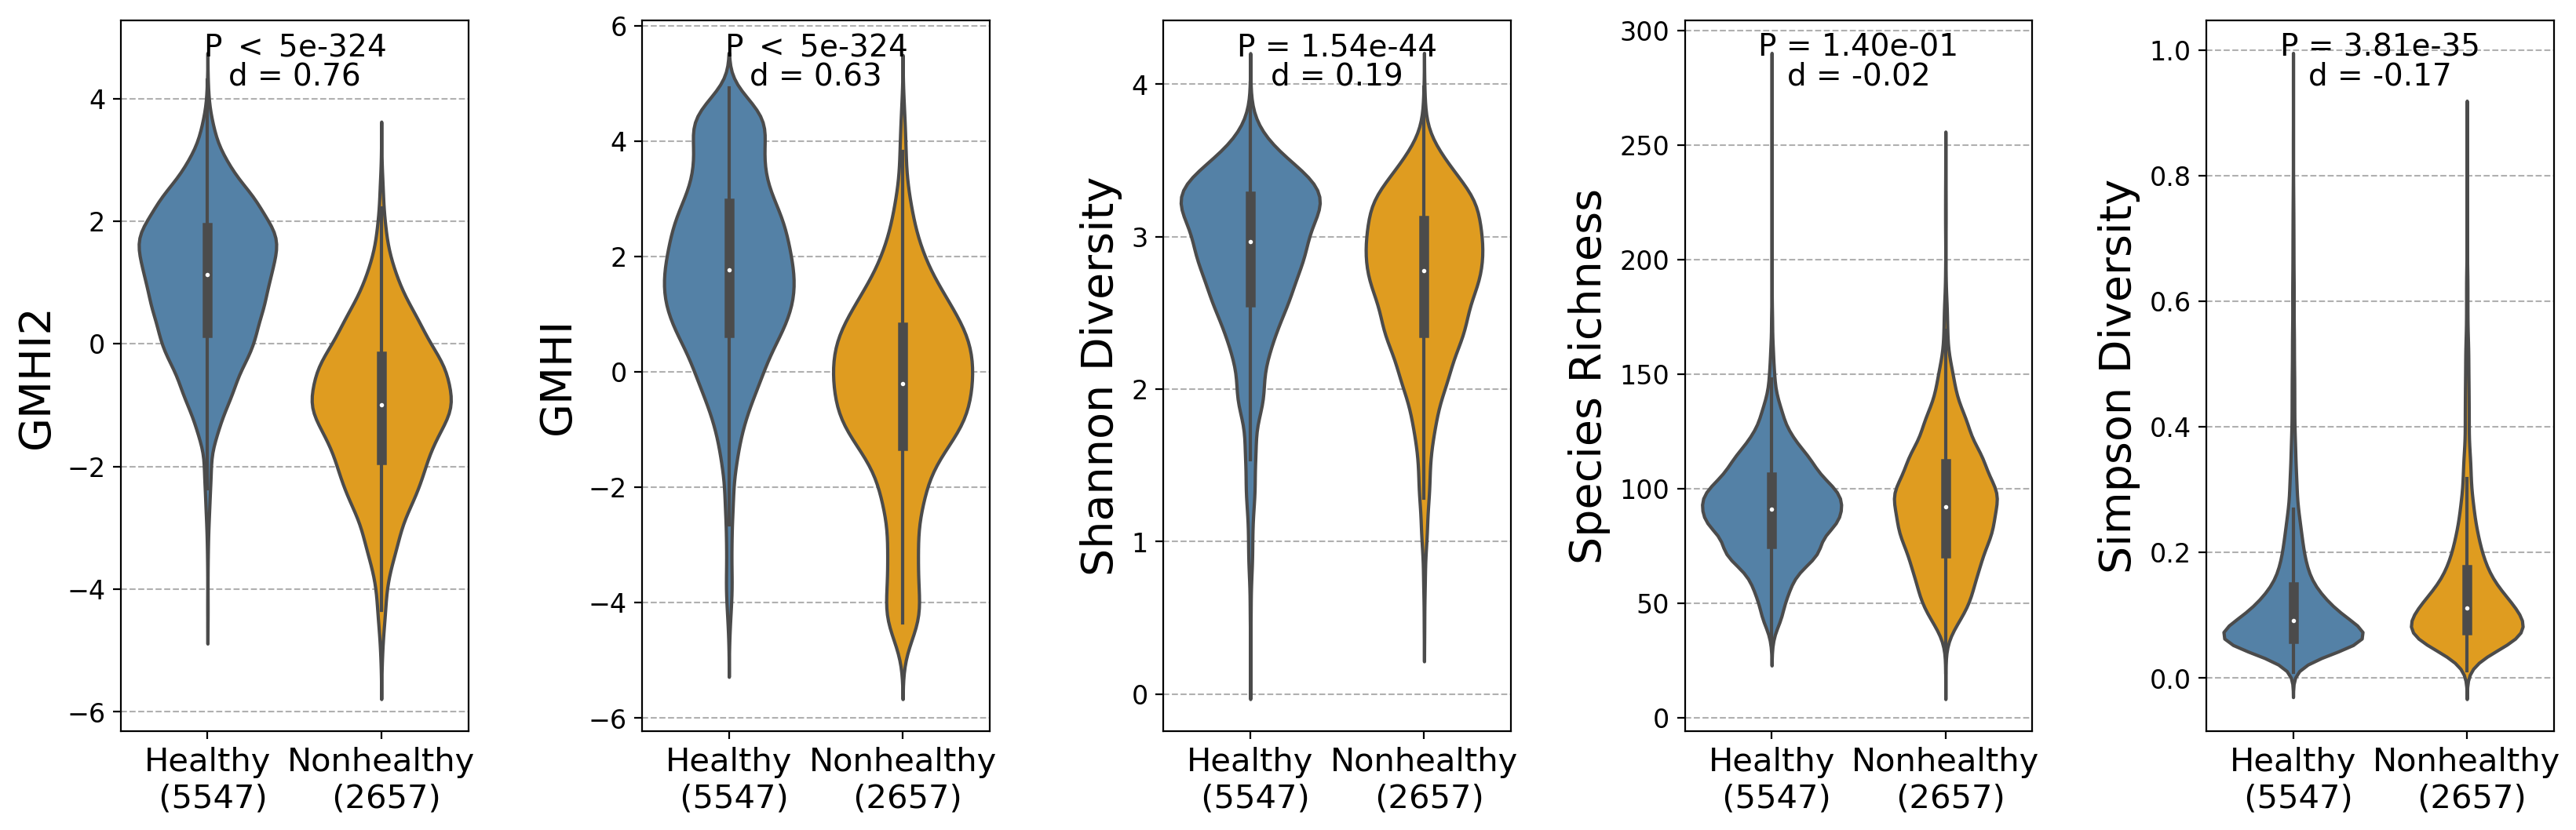

In [10]:
fig, axs = plt.subplots(ncols=5, figsize=figsize, dpi=dpi)
indices = ["GMHI2", "GMHI", "Shannon Diversity","Species Richness", "Simpson Diversity"]
for ind, ax in zip(indices, axs):
    v = sns.violinplot(x="Health status", y=ind, data=data, ax=ax, 
                   palette={healthy_text : healthy_color, nonhealthy_text : nonhealthy_color})
    cliffs_delta, man_whitney_u_p_val = observeDifference(data[ind].iloc[y.values], data[ind].iloc[~y.values])
    
    p_text = (r"P $<$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"P = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"d = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))